In [14]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import select_features
from pycaret.classification import *
from tsfresh import extract_features
from tsfresh import extract_relevant_features
from sklearn.ensemble import ExtraTreesClassifier
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
from notebooks_preprocessing_and_dataframe_creation import preprocessing_functions

In [15]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [16]:
metric = 'F1' # F1 or AUC

In [17]:
df = pd.read_pickle('../data/unified_dataframe/data_unprocessed.pkl')
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,NaN,NaN
1,621e328667b776a240281372,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Maintenance,intrinsic_regulation,NaN,HIGH,AVERAGE,HIGH,LOW,LOW,NaN,NaN
2,621e326767b776a24012e179,2021-05-24,NaN,46.120,53.968,95.3,14.4,80.0,0.666667,0.925,...,Maintenance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Maintenance,identified_regulation,NaN,LOW,LOW,LOW,AVERAGE,HIGH,NaN,NaN
4,621e333567b776a240a0c217,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Contemplation,intrinsic_regulation,NaN,AVERAGE,HIGH,AVERAGE,LOW,LOW,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,621e30b267b776a240c5e13f,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7800,621e312a67b776a240164d59,2022-01-17,34.237581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Contemplation,intrinsic_regulation,NaN,AVERAGE,LOW,HIGH,AVERAGE,LOW,NaN,NaN
7801,621e309b67b776a240b532b0,2022-01-17,31.815133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7802,621e333567b776a240a0c217,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Contemplation,intrinsic_regulation,NaN,AVERAGE,HIGH,AVERAGE,LOW,LOW,NaN,NaN


In [18]:
df_pre = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
df_pre

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Steps_hour14,Steps_hour15,Steps_hour16,Steps_hour17,Steps_hour18,Steps_hour19,Steps_hour20,Steps_hour21,Steps_hour22,Steps_hour23
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,...,191.0,33.0,342.0,1712.0,1838.0,160.0,155.0,37.0,31.0,53.0
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,...,120.0,24.0,446.0,377.0,3165.0,332.0,97.0,9.0,24.0,58.0
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,...,120.0,24.0,446.0,377.0,3165.0,332.0,97.0,9.0,24.0,58.0
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,...,85.0,477.0,390.0,2821.0,293.0,158.0,66.0,0.0,70.0,74.0
4,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,35.216,95.9,14.8,82.0,0.933333,0.725,...,58.0,296.0,401.0,21.0,3054.0,503.0,411.0,96.0,63.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,621e375b67b776a240290cdc,2021-07-22,33.973120,62.388,35.216,95.9,14.6,76.0,0.766667,0.725,...,7.0,60.0,7.0,163.0,92.0,106.0,2034.0,3453.0,49.0,170.0
7800,621e375b67b776a240290cdc,2021-07-23,34.011607,55.542,30.813,95.9,16.6,81.0,0.700000,0.800,...,1013.0,810.0,371.0,833.0,1411.0,93.0,424.0,4029.0,1083.0,42.0
7801,621e375b67b776a240290cdc,2021-07-24,33.687826,69.579,19.407,95.9,17.0,84.0,0.833333,0.900,...,1656.0,1276.0,1903.0,534.0,491.0,583.0,84.0,1103.0,621.0,737.0
7802,621e375b67b776a240290cdc,2021-07-25,34.112386,65.899,22.892,95.9,18.0,84.0,0.833333,0.900,...,42.0,1235.0,716.0,1130.0,1163.0,888.0,245.0,1401.0,54.0,1627.0


# Predict panas from daily dataframe

In [19]:
panas = df.drop(columns=['date','startTime', 'endTime', 'label_sema_negative_feelings', 'label_ipip_agreeableness_category', 'label_ipip_extraversion_category','label_ipip_intellect_category', 'label_ipip_conscientiousness_category', 'label_stai_stress_category', 'label_ipip_stability_category', 'label_ttm_stage', 'label_breq_self_determination'])

In [20]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(panas)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [21]:
s = setup(data=train_data, target='label_panas_negative_affect', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,label_panas_negative_affect
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(5199, 43)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3173,0.5297,0.3463,0.3861,0.3117,0.0195,0.0212,0.0167
dt,Decision Tree Classifier,0.2917,0.4943,0.3065,0.3694,0.2960,-0.0222,-0.0176,0.0100
lda,Linear Discriminant Analysis,0.2853,0.4274,0.2845,0.3109,0.2891,-0.0730,-0.0754,0.0100
ada,Ada Boost Classifier,0.2853,0.5382,0.3046,0.3533,0.2789,-0.0352,-0.0388,0.0333
nb,Naive Bayes,0.2981,0.4549,0.3101,0.3063,0.2763,-0.0216,-0.0187,0.0067
gbc,Gradient Boosting Classifier,0.2821,0.4646,0.3183,0.3602,0.2606,-0.0246,-0.0286,0.1233
lr,Logistic Regression,0.3205,0.4408,0.3116,0.2161,0.2409,-0.0211,-0.0289,0.0100
ridge,Ridge Classifier,0.2340,0.0000,0.2443,0.2620,0.2323,-0.1414,-0.1481,0.0100
et,Extra Trees Classifier,0.2404,0.4065,0.2728,0.3007,0.2241,-0.0777,-0.0889,0.0667
rf,Random Forest Classifier,0.2596,0.4785,0.2948,0.2578,0.2212,-0.0549,-0.0546,0.0800


In [23]:
# plot_model(best, plot='feature')

In [24]:
panas = df_pre.drop(columns=['date', 'label_sema_negative_feelings', 'label_ipip_agreeableness_category', 'label_ipip_extraversion_category','label_ipip_intellect_category', 'label_ipip_conscientiousness_category', 'label_stai_stress_category', 'label_ipip_stability_category', 'label_ttm_stage', 'label_breq_self_determination'])

In [25]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(panas)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [26]:
s = setup(data=train_data, target='label_panas_negative_affect', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_panas_negative_affect
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(5199, 148)"
5,Missing Values,True
6,Numeric Features,107
7,Categorical Features,40
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3387,0.5361,0.3289,0.3674,0.3351,0.0103,0.0127,0.6000
dt,Decision Tree Classifier,0.3035,0.4952,0.2805,0.3894,0.3186,-0.0248,-0.0234,0.2267
gbc,Gradient Boosting Classifier,0.3002,0.4793,0.2898,0.3518,0.3062,-0.0282,-0.0291,5.5533
svm,SVM - Linear Kernel,0.2937,0.0000,0.2973,0.3303,0.3015,-0.0611,-0.0633,0.2400
rf,Random Forest Classifier,0.3056,0.4567,0.2585,0.3546,0.2996,-0.0558,-0.0632,0.3933
knn,K Neighbors Classifier,0.2847,0.4490,0.2877,0.3294,0.2959,-0.0661,-0.0698,0.8200
ridge,Ridge Classifier,0.2832,0.0000,0.2999,0.3492,0.2865,-0.0541,-0.0599,0.2000
lr,Logistic Regression,0.2847,0.4398,0.2997,0.3165,0.2858,-0.0603,-0.0638,0.6633
lightgbm,Light Gradient Boosting Machine,0.2868,0.5045,0.2951,0.3047,0.2733,-0.0449,-0.0459,1.1000
et,Extra Trees Classifier,0.2818,0.4240,0.2767,0.2556,0.2461,-0.0677,-0.0816,0.3833


In [45]:
svm = create_model('svm', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2986,0.0000,0.2732,0.3777,0.3262,-0.0689,-0.0733
1,0.3368,0.0000,0.3725,0.3578,0.3338,0.0129,0.0134
2,0.2456,0.0000,0.2462,0.2555,0.2446,-0.1271,-0.1300
Mean,0.2937,0.0000,0.2973,0.3303,0.3015,-0.0611,-0.0633
Std,0.0374,0.0000,0.0543,0.0536,0.0404,0.0574,0.0590


In [46]:
tuned_svm = tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3840,0.0000,0.3588,0.5174,0.3878,0.0608,0.0705
1,0.5368,0.0000,0.4525,0.5389,0.5081,0.2220,0.2374
2,0.3439,0.0000,0.3677,0.3397,0.3294,0.0230,0.0238
Mean,0.4216,0.0000,0.3930,0.4653,0.4084,0.1019,0.1106
Std,0.0831,0.0000,0.0422,0.0893,0.0744,0.0863,0.0917


In [47]:
print(tuned_svm)

SGDClassifier(alpha=0.3, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.1, fit_intercept=False, l1_ratio=0.5500000001,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
              random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


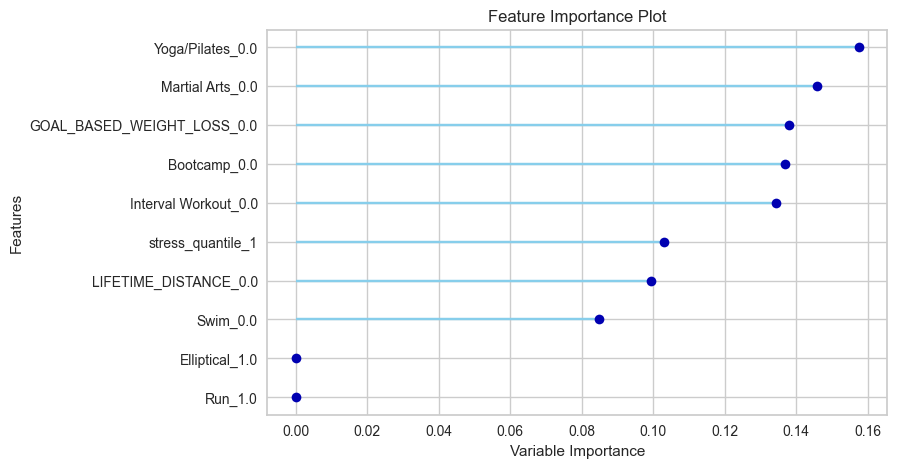

In [48]:
plot_model(tuned_svm, plot = 'feature')

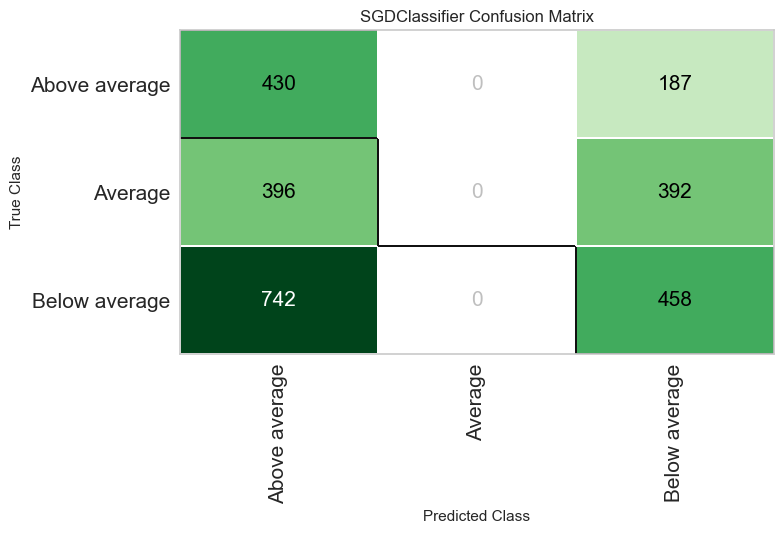

In [49]:
plot_model(tuned_svm, plot = 'confusion_matrix')

In [50]:
d=pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_svm.coef_[0])}).sort_values(by='Value', ascending=False)

In [51]:
d.reset_index(inplace=True)
d=d.head(10)
d = d.drop(columns='index')
d['Label'] = 'panas'
d = d[['Label', 'Feature', 'Value']]
d.to_pickle('../data/feature_importances/panas.pkl')
d

,Label,Feature,Value
0,panas,Yoga/Pilates_0.0,0.157628
1,panas,Martial Arts_0.0,0.145690
2,panas,GOAL_BASED_WEIGHT_LOSS_0.0,0.138061
3,panas,Bootcamp_0.0,0.137005
4,panas,Interval Workout_0.0,0.134333
5,panas,stress_quantile_1,0.103125
6,panas,LIFETIME_DISTANCE_0.0,0.099394
7,panas,Swim_0.0,0.084739
8,panas,Run_1.0,0.000000
9,panas,Elliptical_1.0,0.000000
